In [296]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import sklearn.tree as tree
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, balanced_accuracy_score,  plot_roc_curve, make_scorer, roc_curve

In [246]:
x_train = pd.read_csv("x_train2.csv") 
y_train = pd.read_csv("y_train2.csv")

In [247]:
x_train.head()

,Unnamed: 0,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
0,0,0,0,2,18,5,3,44,-0.015748,0.147931,...,0.059459,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937
1,1,1,0,3,43,15,6,104,0.003984,NaN,...,0.015413,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN
2,2,2,0,4,57,20,8,142,0.000440,-0.096282,...,0.008964,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868
3,3,3,0,8,1,1,1,2,0.031298,-0.429540,...,-0.031769,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458
4,4,4,0,14,36,12,5,92,0.027273,-0.847155,...,-0.038461,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806


In [248]:
x_train.shape

(100000, 48)

In [249]:
x_train.columns

Index(['Unnamed: 0', 'ID', 'DATE', 'STOCK', 'INDUSTRY', 'INDUSTRY_GROUP',
       'SECTOR', 'SUB_INDUSTRY', 'RET_1', 'VOLUME_1', 'RET_2', 'VOLUME_2',
       'RET_3', 'VOLUME_3', 'RET_4', 'VOLUME_4', 'RET_5', 'VOLUME_5', 'RET_6',
       'VOLUME_6', 'RET_7', 'VOLUME_7', 'RET_8', 'VOLUME_8', 'RET_9',
       'VOLUME_9', 'RET_10', 'VOLUME_10', 'RET_11', 'VOLUME_11', 'RET_12',
       'VOLUME_12', 'RET_13', 'VOLUME_13', 'RET_14', 'VOLUME_14', 'RET_15',
       'VOLUME_15', 'RET_16', 'VOLUME_16', 'RET_17', 'VOLUME_17', 'RET_18',
       'VOLUME_18', 'RET_19', 'VOLUME_19', 'RET_20', 'VOLUME_20'],
      dtype='object')

In [250]:
x_train.dtypes

Unnamed: 0          int64
ID                  int64
DATE                int64
STOCK               int64
INDUSTRY            int64
INDUSTRY_GROUP      int64
SECTOR              int64
SUB_INDUSTRY        int64
RET_1             float64
VOLUME_1          float64
RET_2             float64
VOLUME_2          float64
RET_3             float64
VOLUME_3          float64
RET_4             float64
VOLUME_4          float64
RET_5             float64
VOLUME_5          float64
RET_6             float64
VOLUME_6          float64
RET_7             float64
VOLUME_7          float64
RET_8             float64
VOLUME_8          float64
RET_9             float64
VOLUME_9          float64
RET_10            float64
VOLUME_10         float64
RET_11            float64
VOLUME_11         float64
RET_12            float64
VOLUME_12         float64
RET_13            float64
VOLUME_13         float64
RET_14            float64
VOLUME_14         float64
RET_15            float64
VOLUME_15         float64
RET_16      

In [251]:
x_train.count()

Unnamed: 0        100000
ID                100000
DATE              100000
STOCK             100000
INDUSTRY          100000
INDUSTRY_GROUP    100000
SECTOR            100000
SUB_INDUSTRY      100000
RET_1              97771
VOLUME_1           83125
RET_2              97752
VOLUME_2           84874
RET_3              97741
VOLUME_3           84871
RET_4              97729
VOLUME_4           81731
RET_5              97718
VOLUME_5           79836
RET_6              97709
VOLUME_6           79830
RET_7              97709
VOLUME_7           78063
RET_8              97705
VOLUME_8           78045
RET_9              97693
VOLUME_9           78033
RET_10             97690
VOLUME_10          78030
RET_11             97505
VOLUME_11          78004
RET_12             97471
VOLUME_12          82567
RET_13             97421
VOLUME_13          82548
RET_14             97211
VOLUME_14          84148
RET_15             96956
VOLUME_15          80764
RET_16             96927
VOLUME_16          80752


In [252]:
x_train.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100000.0,49999.500000,28867.657797,0.000000,24999.750000,49999.500000,74999.250000,99999.000000
ID,100000.0,49999.500000,28867.657797,0.000000,24999.750000,49999.500000,74999.250000,99999.000000
DATE,100000.0,29.662730,16.906881,0.000000,14.000000,33.000000,44.000000,55.000000
STOCK,100000.0,3494.174560,1454.208740,0.000000,2824.000000,3659.000000,4649.000000,5716.000000
INDUSTRY,100000.0,37.329890,19.714384,0.000000,23.000000,43.000000,53.000000,74.000000
INDUSTRY_GROUP,100000.0,12.751050,7.236937,0.000000,6.000000,15.000000,19.000000,26.000000
SECTOR,100000.0,5.503180,2.415394,0.000000,4.000000,6.000000,7.000000,11.000000
SUB_INDUSTRY,100000.0,90.765250,47.528195,0.000000,51.000000,104.000000,130.000000,182.000000
RET_1,97771.0,0.005855,0.033379,-0.732431,-0.007976,0.003516,0.017094,1.113163
VOLUME_1,83125.0,-0.043007,2.331050,-2.434414,-0.563260,-0.284078,0.068405,395.701822


In [253]:
y_train.head()

,Unnamed: 0,ID,RET
0,0,0,True
1,1,1,True
2,2,2,False
3,3,3,False
4,4,4,False


In [254]:
y_train.shape

(100000, 3)

In [255]:
y_train.columns

Index(['Unnamed: 0', 'ID', 'RET'], dtype='object')

In [256]:
y_train.dtypes

Unnamed: 0    int64
ID            int64
RET            bool
dtype: object

In [257]:
y_train.count()

Unnamed: 0    100000
ID            100000
RET           100000
dtype: int64

In [258]:
y_train.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,100000,NaN,NaN,NaN,49999.5,28867.7,0,24999.8,49999.5,74999.2,99999
ID,100000,NaN,NaN,NaN,49999.5,28867.7,0,24999.8,49999.5,74999.2,99999
RET,100000,2,False,50156,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
x_train.isnull().sum()

Unnamed: 0            0
ID                    0
DATE                  0
STOCK                 0
INDUSTRY              0
INDUSTRY_GROUP        0
SECTOR                0
SUB_INDUSTRY          0
RET_1              2229
VOLUME_1          16875
RET_2              2248
VOLUME_2          15126
RET_3              2259
VOLUME_3          15129
RET_4              2271
VOLUME_4          18269
RET_5              2282
VOLUME_5          20164
RET_6              2291
VOLUME_6          20170
RET_7              2291
VOLUME_7          21937
RET_8              2295
VOLUME_8          21955
RET_9              2307
VOLUME_9          21967
RET_10             2310
VOLUME_10         21970
RET_11             2495
VOLUME_11         21996
RET_12             2529
VOLUME_12         17433
RET_13             2579
VOLUME_13         17452
RET_14             2789
VOLUME_14         15852
RET_15             3044
VOLUME_15         19236
RET_16             3073
VOLUME_16         19248
RET_17             3076
VOLUME_17       

In [260]:
x_train.isnull().sum() / x_train.shape[0]*100

Unnamed: 0         0.000
ID                 0.000
DATE               0.000
STOCK              0.000
INDUSTRY           0.000
INDUSTRY_GROUP     0.000
SECTOR             0.000
SUB_INDUSTRY       0.000
RET_1              2.229
VOLUME_1          16.875
RET_2              2.248
VOLUME_2          15.126
RET_3              2.259
VOLUME_3          15.129
RET_4              2.271
VOLUME_4          18.269
RET_5              2.282
VOLUME_5          20.164
RET_6              2.291
VOLUME_6          20.170
RET_7              2.291
VOLUME_7          21.937
RET_8              2.295
VOLUME_8          21.955
RET_9              2.307
VOLUME_9          21.967
RET_10             2.310
VOLUME_10         21.970
RET_11             2.495
VOLUME_11         21.996
RET_12             2.529
VOLUME_12         17.433
RET_13             2.579
VOLUME_13         17.452
RET_14             2.789
VOLUME_14         15.852
RET_15             3.044
VOLUME_15         19.236
RET_16             3.073
VOLUME_16         19.248


In [261]:
for column in x_train.columns:
    if x_train[column].isnull().sum() != 0:
        for sector in x_train['SECTOR'].unique():
            x_train[column].fillna(np.mean(x_train[x_train['SECTOR'] == sector][column]), inplace=True)

In [262]:
x_train.isnull().sum() / x_train.shape[0]*100

Unnamed: 0        0.0
ID                0.0
DATE              0.0
STOCK             0.0
INDUSTRY          0.0
INDUSTRY_GROUP    0.0
SECTOR            0.0
SUB_INDUSTRY      0.0
RET_1             0.0
VOLUME_1          0.0
RET_2             0.0
VOLUME_2          0.0
RET_3             0.0
VOLUME_3          0.0
RET_4             0.0
VOLUME_4          0.0
RET_5             0.0
VOLUME_5          0.0
RET_6             0.0
VOLUME_6          0.0
RET_7             0.0
VOLUME_7          0.0
RET_8             0.0
VOLUME_8          0.0
RET_9             0.0
VOLUME_9          0.0
RET_10            0.0
VOLUME_10         0.0
RET_11            0.0
VOLUME_11         0.0
RET_12            0.0
VOLUME_12         0.0
RET_13            0.0
VOLUME_13         0.0
RET_14            0.0
VOLUME_14         0.0
RET_15            0.0
VOLUME_15         0.0
RET_16            0.0
VOLUME_16         0.0
RET_17            0.0
VOLUME_17         0.0
RET_18            0.0
VOLUME_18         0.0
RET_19            0.0
VOLUME_19 

In [263]:
x_train = x_train.drop(['ID','Unnamed: 0'],axis=1)
y_train = y_train.drop(['ID','Unnamed: 0'],axis=1)

In [265]:
cat_var = ['STOCK','INDUSTRY','INDUSTRY_GROUP','SUB_INDUSTRY','SECTOR','DATE']

target = ['RET']

num_var = [col for col in x_train.columns if (col not in cat_var) & (col not in target)]

In [266]:
data = pd.concat([x_train, y_train],axis = 1)

In [267]:
ret = ["RET_1","RET_2","RET_3","RET_4","RET_5","RET_6","RET_7","RET_8","RET_9","RET_10","RET_11","RET_12","RET_13","RET_14","RET_15",
"RET_16","RET_17","RET_18","RET_19","RET_20"]

volume = ["VOLUME_1","VOLUME_2","VOLUME_3","VOLUME_4","VOLUME_5","VOLUME_6","VOLUME_7","VOLUME_8","VOLUME_9","VOLUME_10","VOLUME_11","VOLUME_12","VOLUME_13","VOLUME_14","VOLUME_15",
"VOLUME_16","VOLUME_17","VOLUME_18","VOLUME_19","VOLUME_20"]

for sector in data['SECTOR'].unique():
    mean_ret = np.mean(np.mean(data[data['SECTOR'] == sector][ret]))
    mean_volume =  np.mean(np.mean(data[data['SECTOR'] == sector][volume]))
    data.loc[data['SECTOR'] == sector,'mean_ret_by_sector'] = mean_ret
    data.loc[data['SECTOR'] == sector,'mean_vol_by_sector'] = mean_volume

for stock in data['STOCK'].unique():
    mean_ret = np.mean(np.mean(data[data['STOCK'] == stock][ret]))
    mean_volume =  np.mean(np.mean(data[data['STOCK'] == stock][volume]))
    data.loc[data['STOCK'] == stock,'mean_ret_by_stock'] = mean_ret
    data.loc[data['STOCK'] == stock,'mean_vol_by_stock'] = mean_volume

for date in data['DATE'].unique():
    mean_ret = np.mean(np.mean(data[data['DATE'] == date][ret]))
    mean_volume =  np.mean(np.mean(data[data['DATE'] == date][volume]))
    data.loc[data['DATE'] == date,'mean_ret_by_date'] = mean_ret
    data.loc[data['DATE'] == date,'mean_vol_by_date'] = mean_volume

for industry in data['INDUSTRY'].unique():
    mean_ret = np.mean(np.mean(data[data['INDUSTRY'] == industry][ret]))
    mean_volume =  np.mean(np.mean(data[data['INDUSTRY'] == industry][volume]))
    data.loc[data['INDUSTRY'] == industry,'mean_ret_by_indus'] = mean_ret
    data.loc[data['INDUSTRY'] == industry,'mean_vol_by_indus'] = mean_volume


for sub_indus in data['SUB_INDUSTRY'].unique():
    mean_ret = np.mean(np.mean(data[data['SUB_INDUSTRY'] == sub_indus][ret]))
    mean_volume =  np.mean(np.mean(data[data['SUB_INDUSTRY'] == sub_indus][volume]))
    data.loc[data['SUB_INDUSTRY'] == sub_indus,'mean_ret_by_subindus'] = mean_ret
    data.loc[data['SUB_INDUSTRY'] == sub_indus,'mean_vol_by_subindus'] = mean_volume

for indus_g in data['INDUSTRY_GROUP'].unique():
    mean_ret = np.mean(np.mean(data[data['INDUSTRY_GROUP'] == indus_g][ret]))
    mean_volume =  np.mean(np.mean(data[data['INDUSTRY_GROUP'] == indus_g][volume]))
    data.loc[data['INDUSTRY_GROUP'] == indus_g,'mean_ret_by_indusg'] = mean_ret
    data.loc[data['INDUSTRY_GROUP'] == indus_g,'mean_vol_by_indusg'] = mean_volume

In [269]:
data["RET15"] = (data["RET_1"] + data["RET_2"] + data["RET_3"] + data["RET_4"] + data["RET_5"]) / 5
data["RET610"] = (data["RET_6"] + data["RET_7"] + data["RET_8"] + data["RET_9"] + data["RET_10"]) / 5
data["RET1115"] = (data["RET_11"] + data["RET_12"] + data["RET_13"] + data["RET_14"] + data["RET_15"]) / 5
data["RET1620"] = (data["RET_16"] + data["RET_17"] + data["RET_18"] + data["RET_19"] + data["RET_20"]) / 5

data["VOLUME15"] = (data["VOLUME_1"] + data["VOLUME_2"] + data["VOLUME_3"] + data["VOLUME_4"] + data["VOLUME_5"]) / 5
data["VOLUME610"] = (data["VOLUME_6"] + data["VOLUME_7"] + data["VOLUME_8"] + data["VOLUME_9"] + data["VOLUME_10"]) / 5
data["VOLUME1115"] = (data["VOLUME_11"] + data["VOLUME_12"] + data["VOLUME_13"] + data["VOLUME_14"] + data["VOLUME_15"]) / 5
data["VOLUME1620"] = (data["VOLUME_16"] + data["VOLUME_17"] + data["VOLUME_18"] + data["VOLUME_19"] + data["VOLUME_20"]) / 5

data = data.drop(num_var,axis=1)
num_var = ["RET15","RET610","RET1115","RET1620","VOLUME15","VOLUME610","VOLUME1115","VOLUME1620", "mean_ret_by_sector","mean_vol_by_sector", "mean_ret_by_indus","mean_vol_by_indus", "mean_ret_by_date","mean_vol_by_date", "mean_ret_by_subindus","mean_vol_by_subindus",  "mean_ret_by_indusg","mean_vol_by_indusg",  "mean_ret_by_stock","mean_vol_by_stock"]


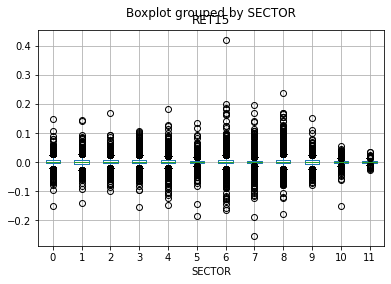

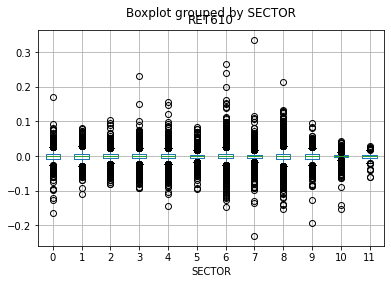

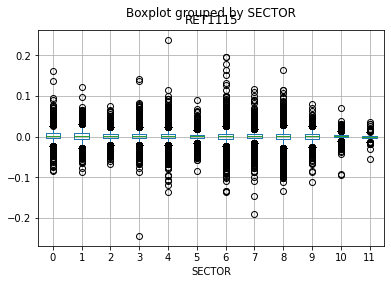

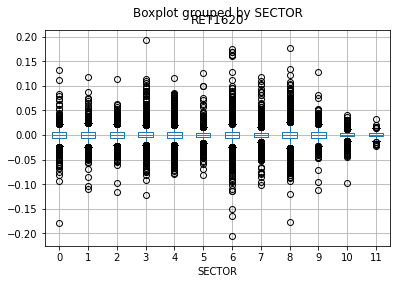

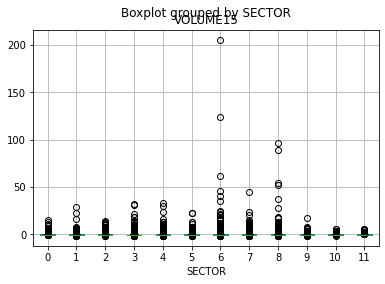

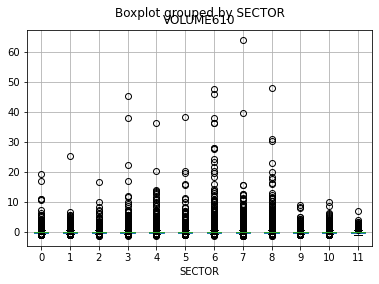

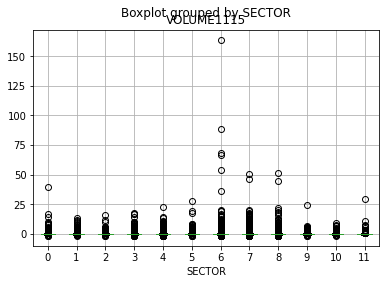

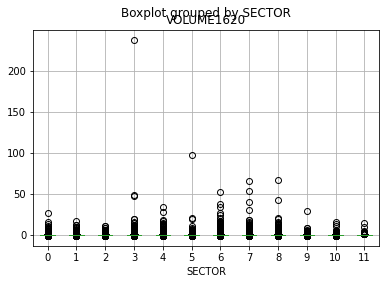

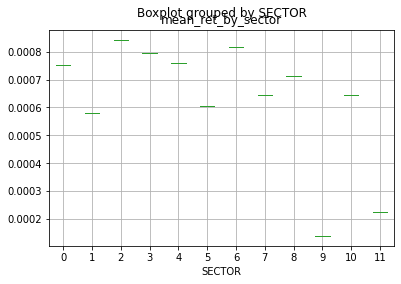

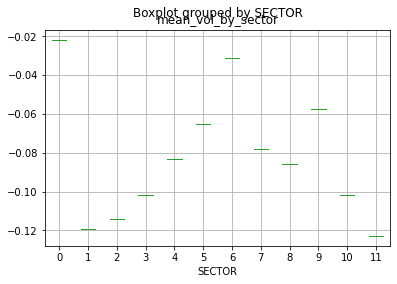

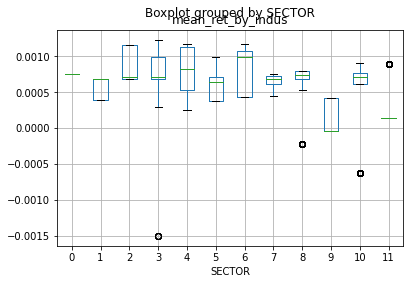

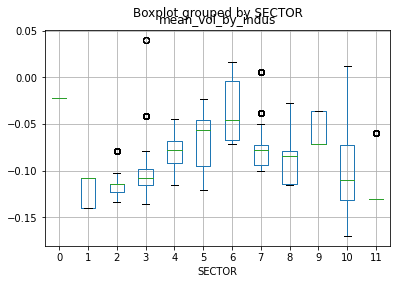

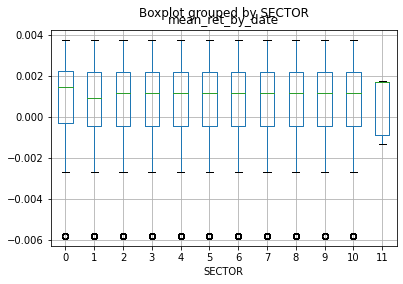

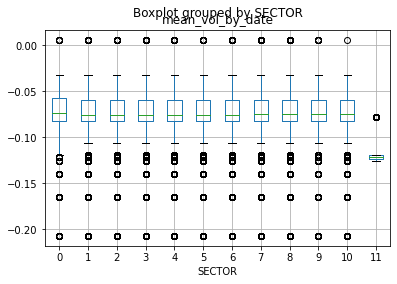

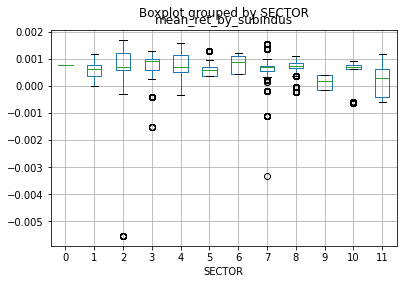

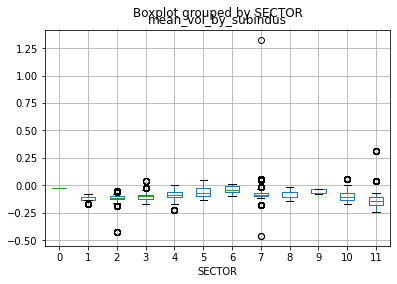

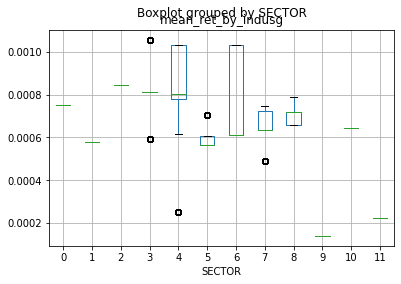

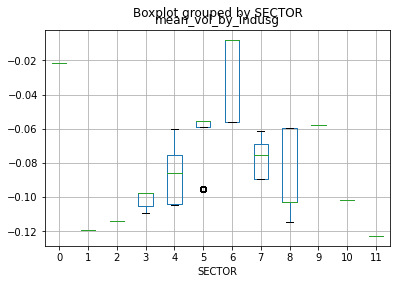

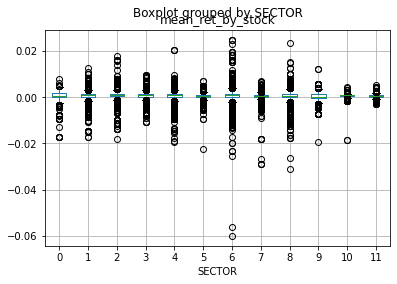

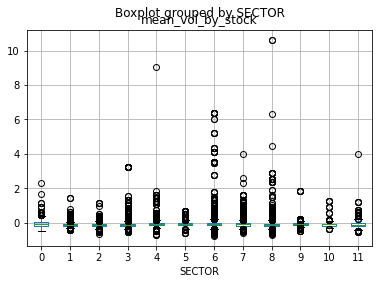

In [270]:
for feature in num_var:
    data.boxplot(column=feature,by='SECTOR')

In [271]:
for feature in num_var:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (data[feature] >= Q1 - 1.5 * IQR) & (data[feature] <= Q3 + 1.5 *IQR)
    data = data.loc[filter]  

In [272]:
data["target"] = np.where(data.RET == True,1,0)

In [273]:
data['target']=data['target'].astype('category')
for col in cat_var:
    data[col] = data[col].astype('category')
data.dtypes

DATE                    category
STOCK                   category
INDUSTRY                category
INDUSTRY_GROUP          category
SECTOR                  category
SUB_INDUSTRY            category
RET                         bool
mean_ret_by_sector       float64
mean_vol_by_sector       float64
mean_ret_by_stock        float64
mean_vol_by_stock        float64
mean_ret_by_date         float64
mean_vol_by_date         float64
mean_ret_by_indus        float64
mean_vol_by_indus        float64
mean_ret_by_subindus     float64
mean_vol_by_subindus     float64
mean_ret_by_indusg       float64
mean_vol_by_indusg       float64
RET15                    float64
RET610                   float64
RET1115                  float64
RET1620                  float64
VOLUME15                 float64
VOLUME610                float64
VOLUME1115               float64
VOLUME1620               float64
target                  category
dtype: object

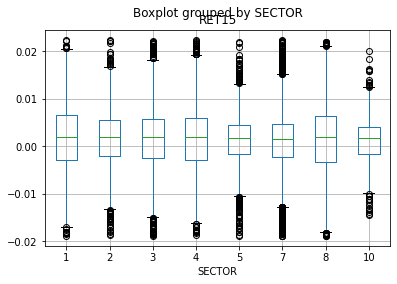

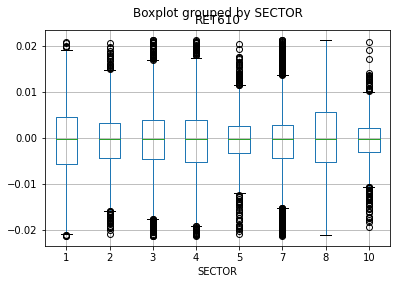

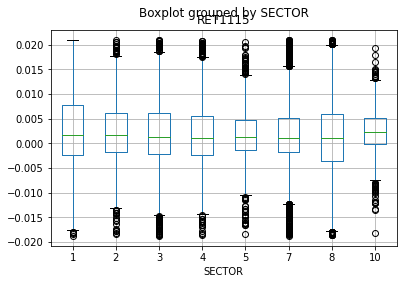

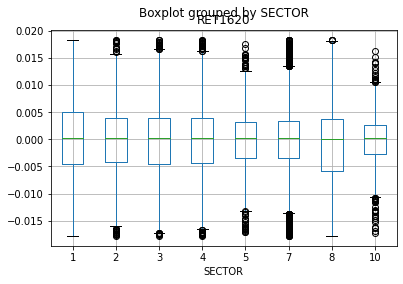

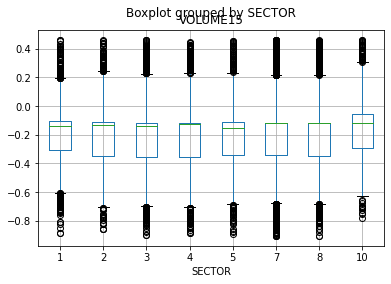

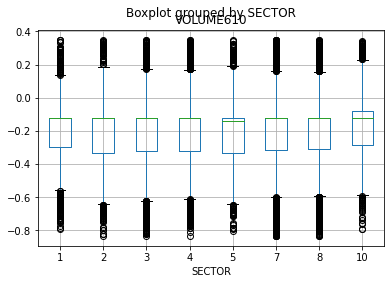

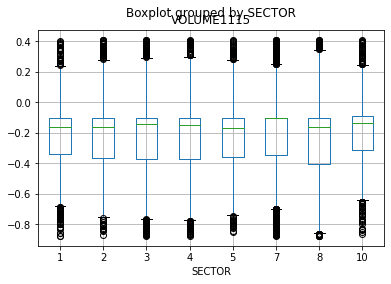

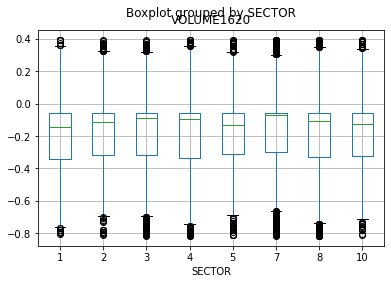

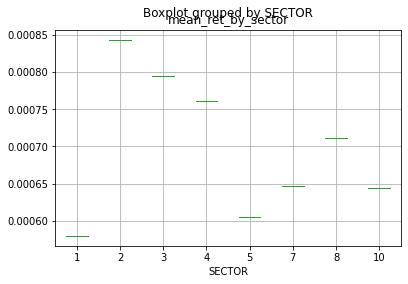

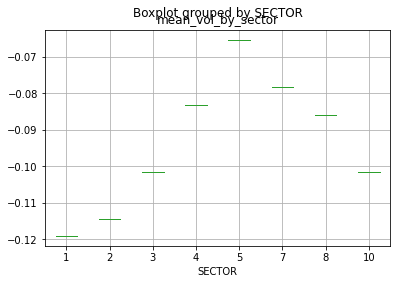

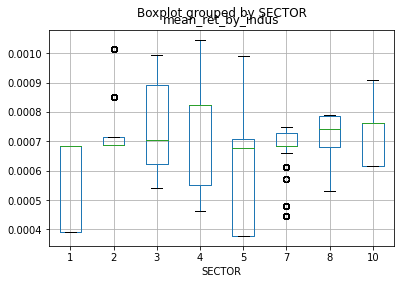

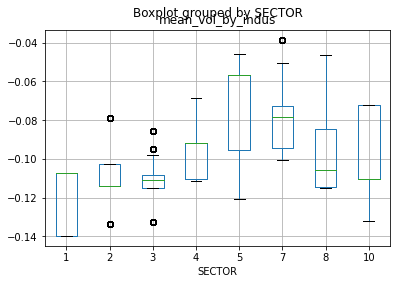

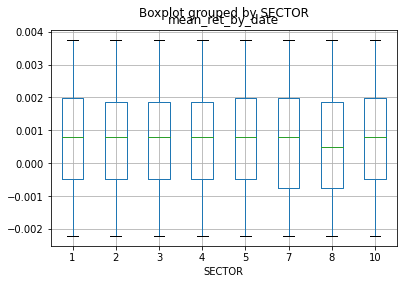

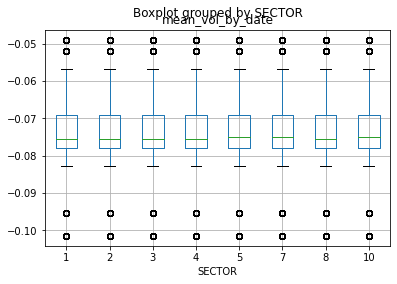

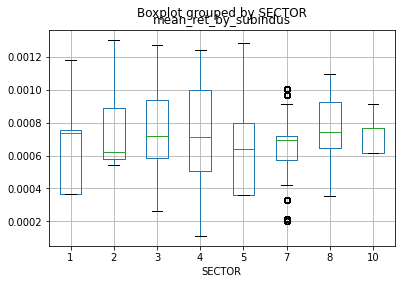

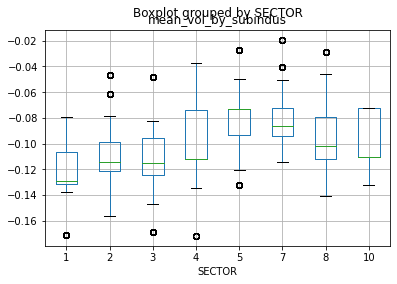

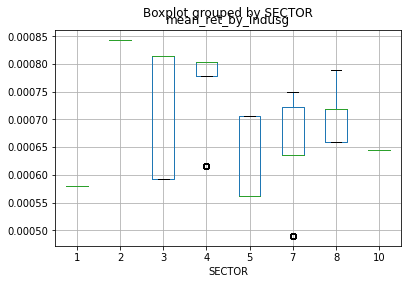

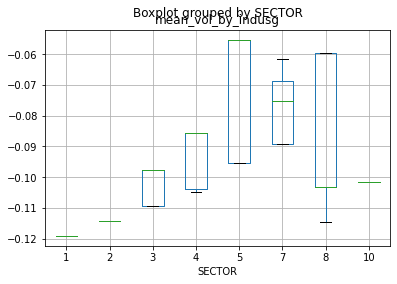

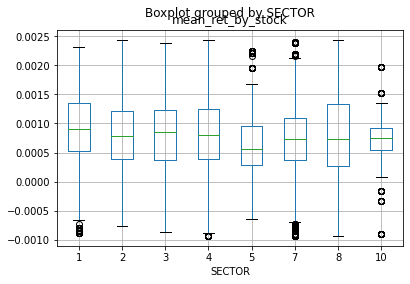

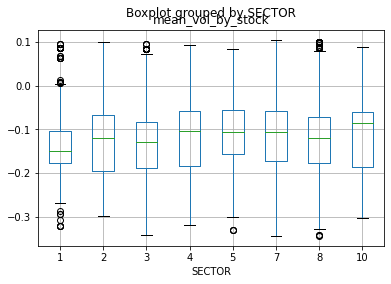

In [274]:
for feature in num_var:
    data.boxplot(column=feature,by='SECTOR')
    print()

In [275]:
target = ['target']
data = data.drop('RET',axis=1)

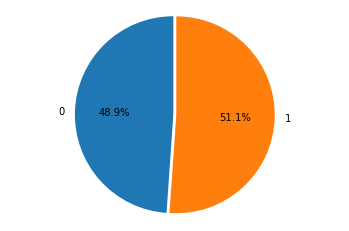

In [276]:
labels = '0', '1'
y0 = data.loc[data['target'] ==0].shape[0]
y1 = data.loc[data['target'] == 1].shape[0]
sizes = [y0,y1]
explode = (0,0.03)

fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

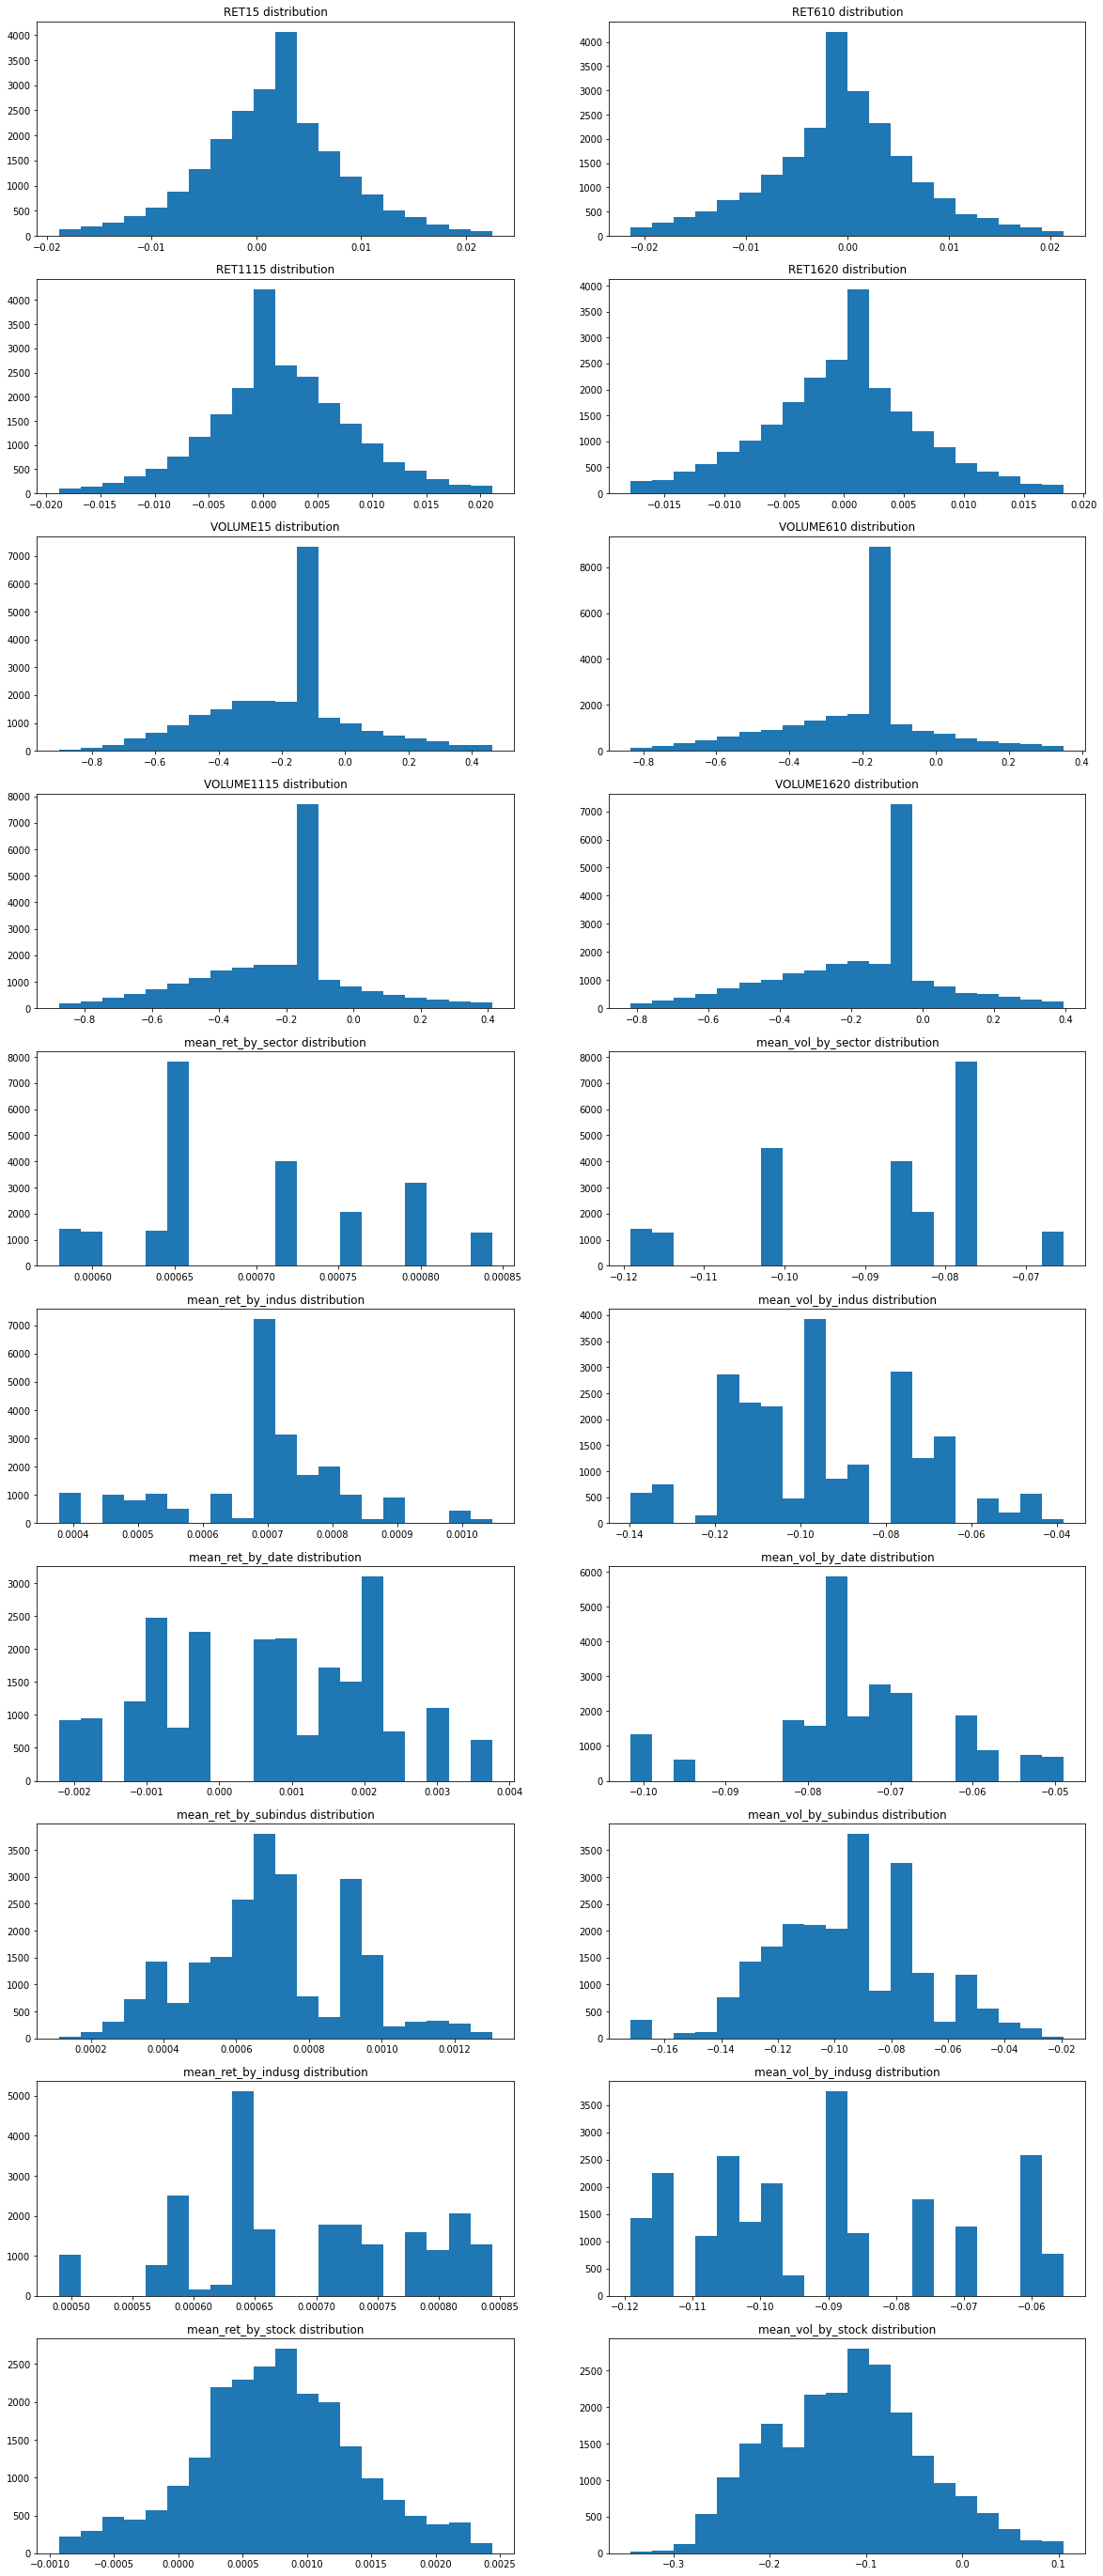

In [277]:
fig=plt.figure(figsize=(20, 100))
i=1
for feature in num_var:
    plt.subplot(20, 2, i)
    plt.hist(data[feature], bins = 20)
    plt.title(feature + ' distribution')
    i+=1

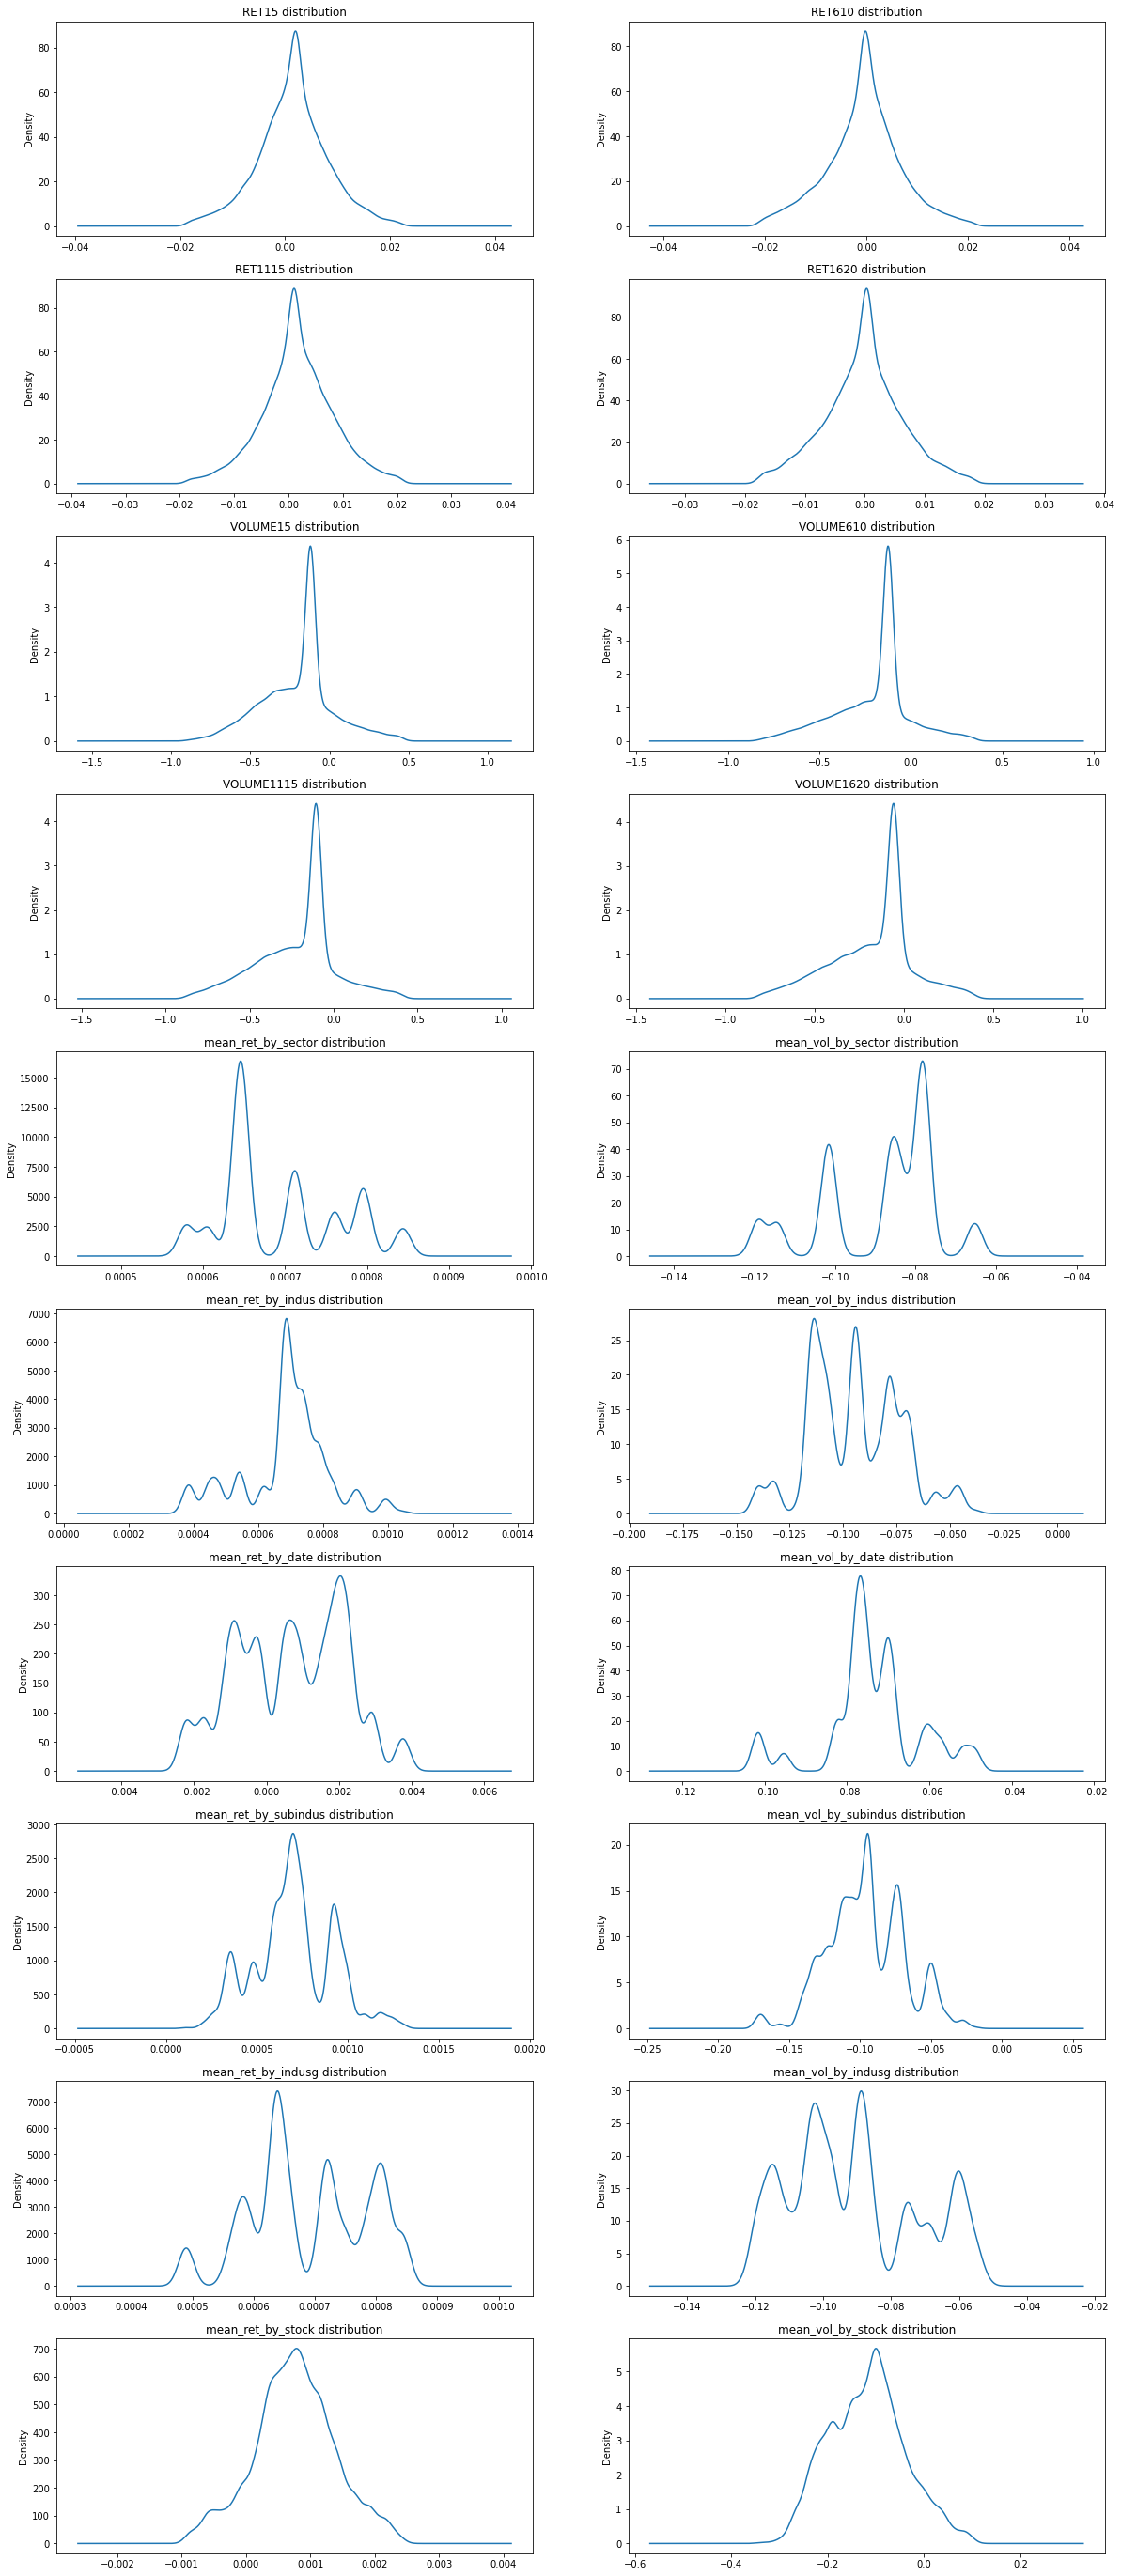

In [278]:
fig=plt.figure(figsize=(20, 100))
i=1
for feature in num_var:
    plt.subplot(20, 2, i)
    data[feature].plot.kde()
    plt.title(feature + ' distribution')
    i+=1

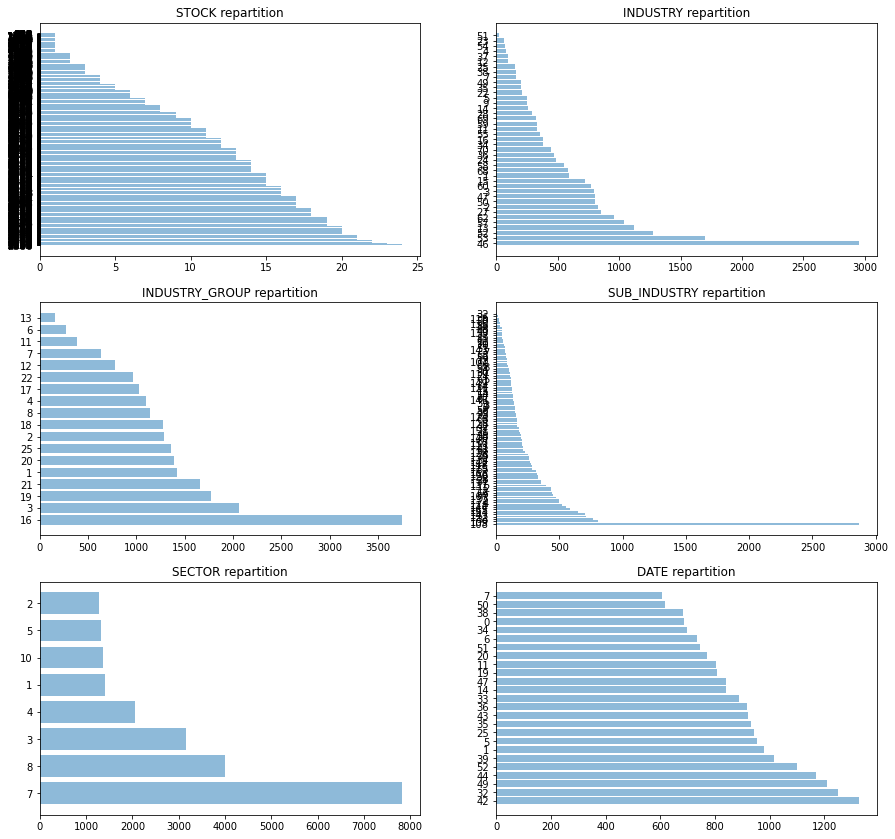

In [279]:
fig=plt.figure(figsize=(15, 30))
i=1

for feature in cat_var:
    plt.subplot(6, 2, i)
    dfTemp = pd.DataFrame(data[feature].value_counts()).reset_index()
    y_pos = np.arange(len(dfTemp['index']))
    plt.barh(y_pos, dfTemp[feature], align='center', alpha=0.5)
    plt.yticks(y_pos, dfTemp['index'])
    plt.title(feature + ' repartition')
    i+=1

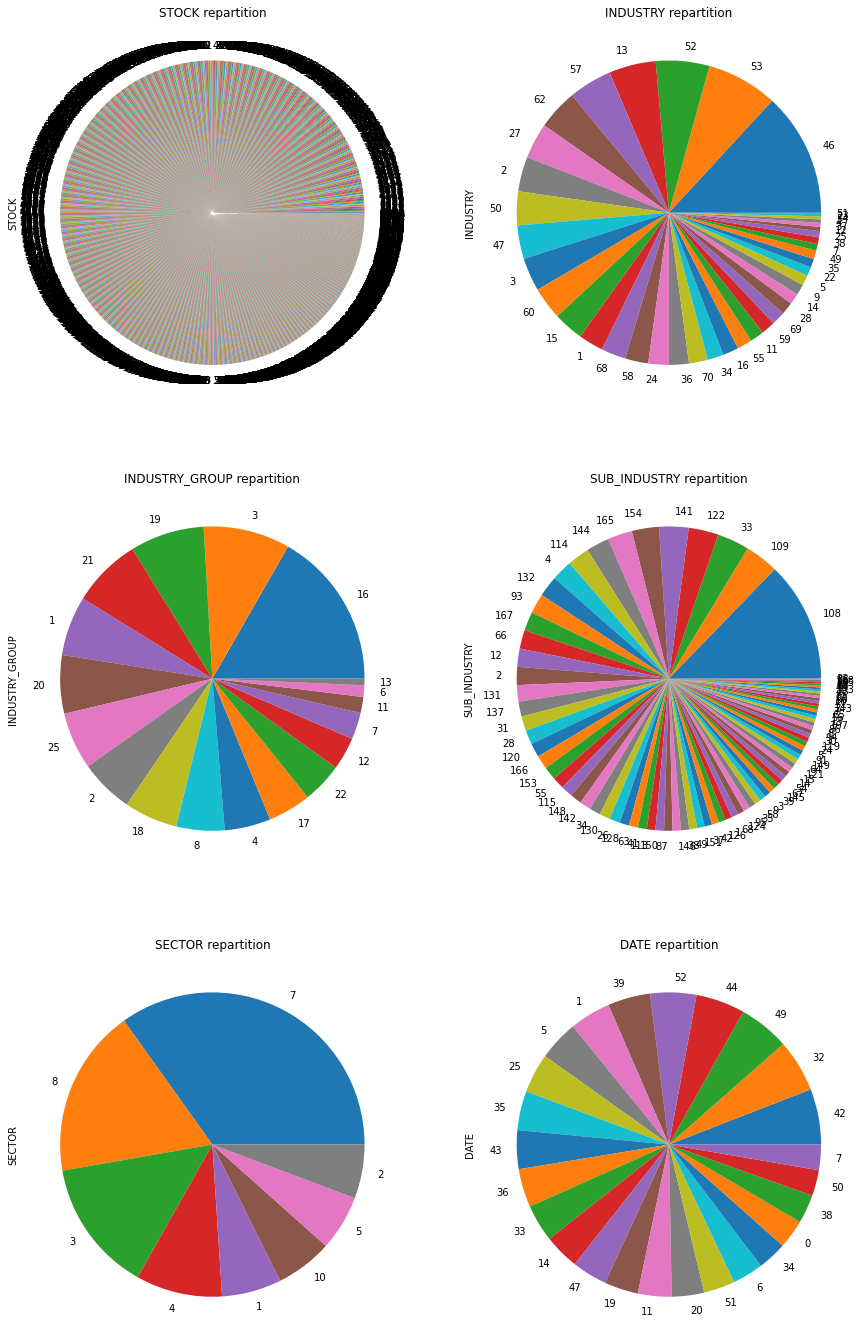

In [280]:
fig=plt.figure(figsize=(15, 50))
i=1

for feature in cat_var:
    plt.subplot(6, 2, i)
    data[feature].value_counts().plot.pie()
    plt.title(feature + ' repartition')
    i+=1


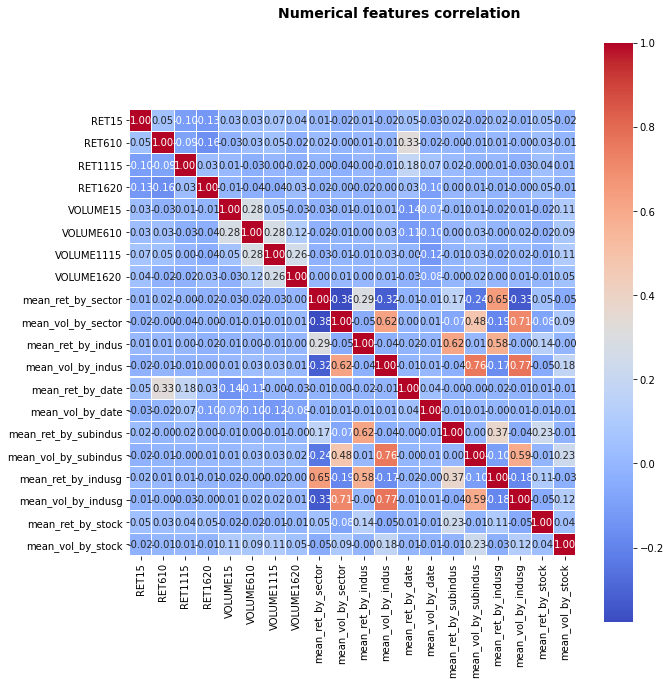

In [281]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,10))

corr = data[num_var].corr()

hm = sns.heatmap(corr, 
                 ax=ax,
                 cmap="coolwarm", 
                 square=True,    
                 annot=True, 
                 fmt='.2f',
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Numerical features correlation',fontsize=14, fontweight='bold')
plt.show()

In [282]:
for X in cat_var:
    Y = "target"
    cont = pd.pivot_table(data[[X, Y]], index=X, columns=Y, aggfunc=len).fillna(0)
    chi2, pvalue, degrees, expected = chi2_contingency(cont)
    print("Chi2 test " + X)
    print(chi2)
    print(format(pvalue, '.4f'))
    print(degrees)
    print()

Chi2 test STOCK
1999.579300861492
0.8224
2059

Chi2 test INDUSTRY
108.19069950330129
0.0000
40

Chi2 test INDUSTRY_GROUP
67.2758806084916
0.0000
17

Chi2 test SUB_INDUSTRY
170.02531942801969
0.0000
88

Chi2 test SECTOR
39.18808958573603
0.0000
7

Chi2 test DATE
98.3670007049081
0.0000
24



In [283]:
data = data.drop('STOCK',axis=1)

In [284]:
cat_var = ['INDUSTRY', 'INDUSTRY_GROUP', 'SUB_INDUSTRY', 'SECTOR','DATE']

In [285]:
X = data.drop(['target'],axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [286]:
numeric_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant", fill_value=0)),("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))])
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, num_var),
                                         ("cat", categorical_transformer, cat_var)])

In [287]:
train = pd.concat([X_train, y_train], axis=1)
train1 = train.loc[train['target'] == 1].reset_index(drop=True)
train0 = train.loc[train['target'] == 0].reset_index(drop=True)
print(train1.shape[0])
print(train0.shape[0])

8628
8202


In [288]:
UnderSampling = train1.sample(n = train0.shape[0], random_state=13)
BalanceData = pd.concat([train0, UnderSampling], axis=0)
X_train = BalanceData.drop("target", axis=1)
y_train = BalanceData["target"]

In [289]:
train = pd.concat([X_train, y_train], axis=1)
train1 = train.loc[train['target'] == 1].reset_index(drop=True)
train0 = train.loc[train['target'] ==0].reset_index(drop=True)
print(train1.shape[0])
print(train0.shape[0])

8202
8202


In [300]:
models = [('tree', tree.DecisionTreeClassifier(max_depth =None)),
    ('knn', KNeighborsClassifier()),
        ("logreg", LogisticRegression(max_iter=5000, random_state=1)),
         ("RF", RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)),
         ("svc", LinearSVC(max_iter=5000))]

grids = {"knn" : {'knn__n_neighbors': [1, 2, 3, 4, 5]},
        "logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)
                    }, 
         "RF" : {'RF__n_estimators' : np.arange(60,400,30),
                 'RF__max_depth': np.arange(7, 13)
                },
         "svc" : {'svc__C': np.logspace(-2, 2, 5, base=2)},
         "tree" : {'tree__max_depth': np.arange(7, 13)}
        }

for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X_train, y_train) 
    print('Returned hyperparameter: {}'.format(clf.best_params_))
    print('Best classification accuracy in train is: {}'.format(clf.best_score_))
    print('Classification accuracy on test is: {}'.format(clf.score(X_test, y_test)))
    print()

Returned hyperparameter: {'tree__max_depth': 12}
Best classification accuracy in train is: 0.5260911972689587
Classification accuracy on test is: 0.5299465240641711

Returned hyperparameter: {'knn__n_neighbors': 3}
Best classification accuracy in train is: 0.5632162887100707
Classification accuracy on test is: 0.5787878787878787

Returned hyperparameter: {'logreg__C': 0.25}
Best classification accuracy in train is: 0.5307242136064375
Classification accuracy on test is: 0.5324420677361854

Returned hyperparameter: {'RF__max_depth': 12, 'RF__n_estimators': 330}
Best classification accuracy in train is: 0.5852840770543769
Classification accuracy on test is: 0.6110516934046346



c:\users\lilia\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\lilia\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\lilia\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Returned hyperparameter: {'svc__C': 1.0}
Best classification accuracy in train is: 0.5308461350890027
Classification accuracy on test is: 0.5351158645276293



In [301]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1 - conf_accuracy
    
    # calculate the sensitivity (recall)
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TP / float(TP + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*30)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity (Recall): {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

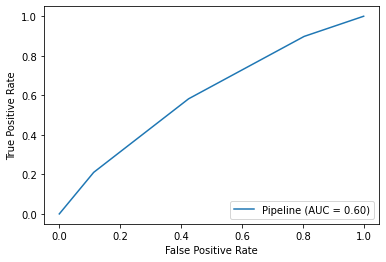

In [303]:
best_KNN = KNeighborsClassifier(n_neighbors=3)
pipe = Pipeline(steps=[('preprocessor', preproc), ('KNN', best_KNN)])
best_pipe = pipe.fit(X_train, y_train)
ROC = plot_roc_curve(best_pipe, X_test, y_test)
plt.show()

Balanced Accuracy: 0.5787423094523821


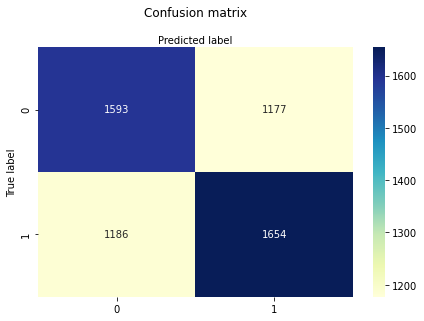

In [304]:
print("Balanced Accuracy:",balanced_accuracy_score(y_test,best_pipe.predict(X_test)))
cnf_matrix = confusion_matrix(y_test, best_pipe.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [305]:
confusion_metrics(cnf_matrix)

True Positives: 1654
True Negatives: 1593
False Positives: 1177
False Negatives: 1186
------------------------------
Accuracy: 0.58
Mis-Classification: 0.42
Sensitivity (Recall): 0.58
Specificity: 0.58
Precision: 0.58
f_1 Score: 0.58


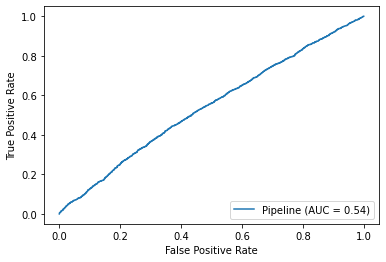

In [306]:
best_logreg = LogisticRegression(max_iter=5000, C=0.25, random_state=1)
pipe = Pipeline(steps=[('preprocessor', preproc), ('LogisticRegression', best_logreg)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
ROC = plot_roc_curve(pipe, X_test, y_test)
plt.show()

Balanced Accuracy: 0.5328608837138353


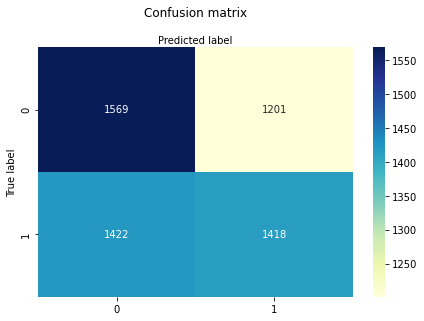

In [307]:
print("Balanced Accuracy:",balanced_accuracy_score(y_test,y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [308]:
confusion_metrics(cnf_matrix)

True Positives: 1418
True Negatives: 1569
False Positives: 1201
False Negatives: 1422
------------------------------
Accuracy: 0.53
Mis-Classification: 0.47
Sensitivity (Recall): 0.5
Specificity: 0.57
Precision: 0.54
f_1 Score: 0.52


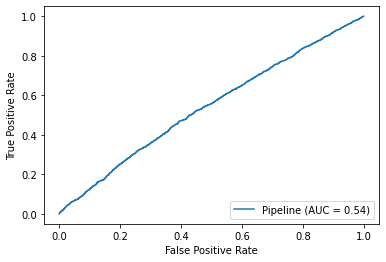

In [309]:
best_SVC = LinearSVC(max_iter=5000,C=1.0)
pipe = Pipeline(steps=[('preprocessor', preproc), ('SVC', best_SVC)])
best_pipe = pipe.fit(X_train, y_train)
ROC = plot_roc_curve(best_pipe, X_test, y_test)
plt.show()

Balanced Accuracy: 0.535550668632735


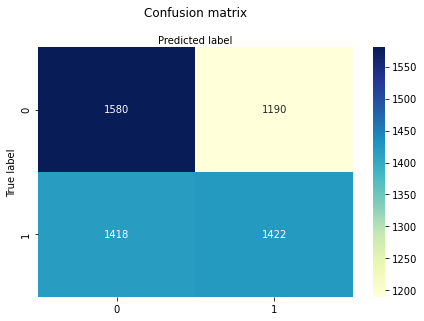

In [310]:
print("Balanced Accuracy:",balanced_accuracy_score(y_test,best_pipe.predict(X_test)))
cnf_matrix = confusion_matrix(y_test, best_pipe.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [311]:
confusion_metrics(cnf_matrix)

True Positives: 1422
True Negatives: 1580
False Positives: 1190
False Negatives: 1418
------------------------------
Accuracy: 0.54
Mis-Classification: 0.46
Sensitivity (Recall): 0.5
Specificity: 0.57
Precision: 0.54
f_1 Score: 0.52


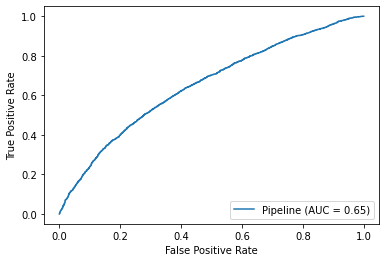

In [321]:
best_RF = RandomForestClassifier(n_estimators=330, max_depth=12, random_state=1)
pipe = Pipeline(steps=[('preprocessor', preproc), ('RandomForest', best_RF)])
best_pipe = pipe.fit(X_train, y_train)
ROC = plot_roc_curve(best_pipe, X_test, y_test)
plt.show()

Balanced Accuracy: 0.6109421874205522


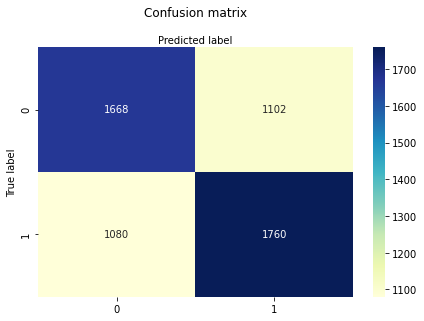

In [322]:
print("Balanced Accuracy:",balanced_accuracy_score(y_test,best_pipe.predict(X_test)))
cnf_matrix = confusion_matrix(y_test, best_pipe.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [323]:
confusion_metrics(cnf_matrix)

True Positives: 1760
True Negatives: 1668
False Positives: 1102
False Negatives: 1080
------------------------------
Accuracy: 0.61
Mis-Classification: 0.39
Sensitivity (Recall): 0.62
Specificity: 0.6
Precision: 0.61
f_1 Score: 0.62


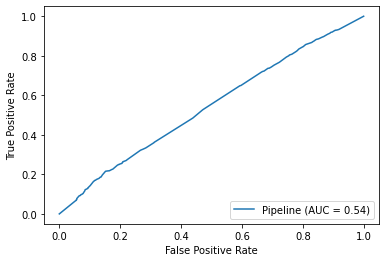

In [315]:
best_decisionTree = DecisionTreeClassifier(max_depth=12)
pipe = Pipeline(steps=[('preprocessor', preproc), ('tree', best_decisionTree)])
best_pipe = pipe.fit(X_train, y_train)
ROC = plot_roc_curve(best_pipe, X_test, y_test)
plt.show()

Balanced Accuracy: 0.5275448721208116


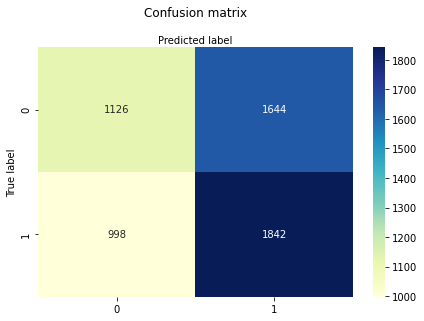

In [316]:
print("Balanced Accuracy:",balanced_accuracy_score(y_test,best_pipe.predict(X_test)))
cnf_matrix = confusion_matrix(y_test, best_pipe.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [317]:
confusion_metrics(cnf_matrix)

True Positives: 1842
True Negatives: 1126
False Positives: 1644
False Negatives: 998
------------------------------
Accuracy: 0.53
Mis-Classification: 0.47
Sensitivity (Recall): 0.65
Specificity: 0.41
Precision: 0.53
f_1 Score: 0.58


In [324]:
num_check = []
cat_check = []
all_type_var = []

for col in X_train.columns.tolist():
    if is_numeric_dtype(X_train[col]) == True:
        num_check.append(col)
        all_type_var.append(col)
    elif is_categorical_dtype(X_train[col]) == True:
        cat_feature_names = pd.get_dummies(X_train[col]).columns.tolist()
        new_cat_feature_names = [col + "_" + str(x) for x in cat_feature_names]
        cat_check.extend(new_cat_feature_names)
        all_type_var.extend(new_cat_feature_names)

In [325]:
importances = pipe.named_steps["RandomForest"].feature_importances_
data = {'Variables':all_type_var, 'Importances':importances} 
feature_importances = pd.DataFrame(data).sort_values(by ='Importances', ascending=False)
feature_importances.head()

,Variables,Importances
1,DATE_1,0.063520
2,DATE_5,0.059095
0,DATE_0,0.058099
19,DATE_44,0.056024
3,DATE_6,0.055702


In [329]:
feature_importances['Importances'][0:10]

1     0.063520
2     0.059095
0     0.058099
19    0.056024
3     0.055702
6     0.050604
7     0.050075
18    0.049099
4     0.048208
5     0.046465
Name: Importances, dtype: float64

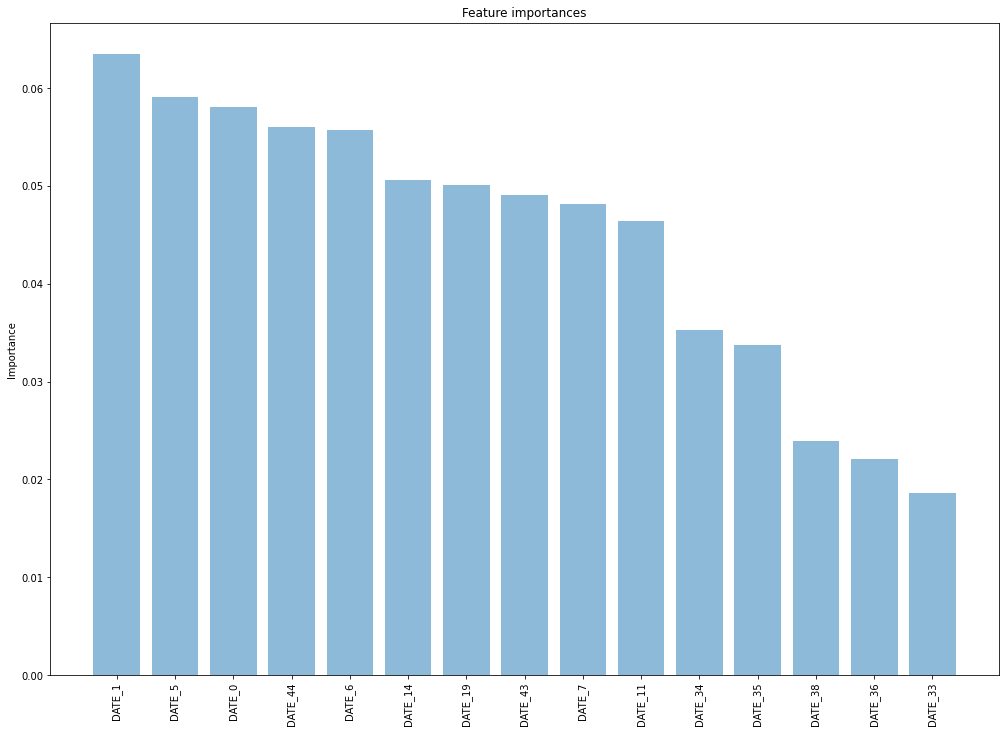

In [330]:
f = plt.figure(figsize=(17,12))
y_pos = np.arange(15)
plt.bar(y_pos, feature_importances['Importances'][0:15], align='center', alpha=0.5)
plt.xticks(y_pos, feature_importances['Variables'][0:15], rotation='vertical')
plt.ylabel('Importance')
plt.title('Feature importances')
plt.show()